# Procesamiento y Etiquetado de Datos

**Docente:** Ph.D. John William Branch  
**Asistente de Docencia:** Sergio Robles

Clasificación y Reconocimiento de Patrones  
Universidad Nacional - Sede Medellin

## Librerías

Librerías y paquetes de python a utilizar en el siguiente notebook.  
(Deben estar previamente instalados)

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import skimage as sk
from skimage import transform
from skimage import util
from sklearn import preprocessing
from scipy import ndarray

In [2]:
# Utils
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

## Datos Estructurados

Los datos estructurados son aquellos que estan organizados en variables o atributos. Comunmente se presentan o almacenan en matrices donde cada ejemplo es una fila de la matriz, y cada atributo, una columna.

In [3]:
# Leer los datos utilizando la libreria "pandas"
df = pd.read_csv('data/data.csv', sep=";")

In [4]:
# Imprimir los primeros 5
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,NaN,2/09/2018 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,4.235779e+09,-7.113937e+09
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,NaN,21/08/2018 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,4.230682e+09,-7.106030e+09
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,NaN,3/09/2018 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,4.234659e+09,-7.107243e+09
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,NaN,3/09/2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,4.233418e+09,-7.107866e+09
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,NaN,3/09/2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,4.227537e+09,-7.109036e+09


In [5]:
# Imprimir el tamaño del "DataFrame"
df.shape

(319073, 16)

### Procesamiento de Datos

Aunque los datos estructurados esten organizados por atributos, no siempre se obtienen con las mejores condiciones. Debido a esto muchos conjuntos de datos pueden tener datos faltantes, datos errados, valores no estandarizados, etc.  
Por esto se busca realizar ciertas operaciones o procesamiento para mejorar la calidad de los datos.

### Datos Nulos

In [5]:
# Eliminar las filas donde al menos un dato sea nulo
df_no_null = df.dropna(axis=0, how='any')

In [6]:
df_no_null.shape

(971, 16)

In [7]:
df_no_null_2 = df.dropna(axis=0, how='all')

In [8]:
df_no_null_2.shape

(319073, 16)

### Nuevos Atributos

In [9]:
df = df_no_null

In [10]:
# Localización
df['Location'] = list(zip(df['Lat'], df['Long']))

In [11]:
# Función de Pandas para imprimir los primeros 5 elementos del dataset
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1295,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540.0,Y,29/08/2018 23:19,2018,8,Wednesday,23,Part One,HILLIS RD,4.225041e+09,-7.113174e+09,"(4225040550.0, -7113173740.0)"
1860,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183.0,Y,27/08/2018 22:56,2018,8,Monday,22,Part One,DUDLEY ST,4.232104e+09,-7.107215e+09,"(4232104169.0, -7107215291.0)"
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312.0,Y,22/08/2018 15:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,4.231569e+09,-7.108951e+09,"(4231568920.0, -7108951391.0)"
3260,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312.0,Y,22/08/2018 15:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,4.231569e+09,-7.108951e+09,"(4231568920.0, -7108951391.0)"
4107,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900.0,Y,19/08/2018 22:46,2018,8,Sunday,22,Part One,MCNULTY CT,4.237808e+09,-7.105784e+09,"(4237808452.0, -7105784115.0)"


In [12]:
# Fecha y Hora separadas
df['Date'] = df.apply(lambda x: x['OCCURRED_ON_DATE'].split(' ')[0], axis=1)
df['Time'] = df.apply(lambda x: x['OCCURRED_ON_DATE'].split(' ')[1], axis=1)

In [13]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Date,Time
1295,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540.0,Y,29/08/2018 23:19,2018,8,Wednesday,23,Part One,HILLIS RD,4.225041e+09,-7.113174e+09,"(4225040550.0, -7113173740.0)",29/08/2018,23:19
1860,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183.0,Y,27/08/2018 22:56,2018,8,Monday,22,Part One,DUDLEY ST,4.232104e+09,-7.107215e+09,"(4232104169.0, -7107215291.0)",27/08/2018,22:56
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312.0,Y,22/08/2018 15:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,4.231569e+09,-7.108951e+09,"(4231568920.0, -7108951391.0)",22/08/2018,15:00
3260,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312.0,Y,22/08/2018 15:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,4.231569e+09,-7.108951e+09,"(4231568920.0, -7108951391.0)",22/08/2018,15:00
4107,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900.0,Y,19/08/2018 22:46,2018,8,Sunday,22,Part One,MCNULTY CT,4.237808e+09,-7.105784e+09,"(4237808452.0, -7105784115.0)",19/08/2018,22:46


In [14]:
df.shape

(971, 19)

In [15]:
def dayOfWeekToNumber(day):
    res = 1
    if(day == 'Monday'):
        res = 2
    elif(day == 'Tuesday'):
        res = 3
    elif(day == 'Wednesday'):
        res = 4
    elif(day == 'Thursday'):
        res = 5
    elif(day == 'Friday'):
        res = 6
    elif(day == 'Saturday'):
        res = 7
    return res

In [14]:
# Numero de día de la semana
df['Number_day_of_week'] = df.apply(lambda x: dayOfWeekToNumber(x['DAY_OF_WEEK']), axis=1)

### Variables dummies

Las variables o atributos categóricos son problemáticos a la hora de aplicar algunos métodos estadísticos y matemáticos. Para esto, se utiliza una técnica para generar nuevas variables que representen el dato de los atributos categóricos. Estas variables reciben el nombre de variables "dummies".

In [16]:
# Función de Pandas para crear un dataframe con variables Dummies de una variable Categorica
dummies = pd.get_dummies(df['UCR_PART'])

In [17]:
dummies.head()

,Other,Part One,Part Three,Part Two
1295,0,1,0,0
1860,0,1,0,0
3259,0,1,0,0
3260,0,0,0,1
4107,0,1,0,0


In [18]:
# Función de Pandas para concatenar dos dataframes
df = pd.concat([df, dummies], axis=1)

In [19]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,STREET,Lat,Long,Location,Date,Time,Other,Part One,Part Three,Part Two
1295,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540.0,Y,29/08/2018 23:19,2018,8,...,HILLIS RD,4.225041e+09,-7.113174e+09,"(4225040550.0, -7113173740.0)",29/08/2018,23:19,0,1,0,0
1860,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183.0,Y,27/08/2018 22:56,2018,8,...,DUDLEY ST,4.232104e+09,-7.107215e+09,"(4232104169.0, -7107215291.0)",27/08/2018,22:56,0,1,0,0
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312.0,Y,22/08/2018 15:00,2018,8,...,HOLLANDER ST,4.231569e+09,-7.108951e+09,"(4231568920.0, -7108951391.0)",22/08/2018,15:00,0,1,0,0
3260,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312.0,Y,22/08/2018 15:00,2018,8,...,HOLLANDER ST,4.231569e+09,-7.108951e+09,"(4231568920.0, -7108951391.0)",22/08/2018,15:00,0,0,0,1
4107,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900.0,Y,19/08/2018 22:46,2018,8,...,MCNULTY CT,4.237808e+09,-7.105784e+09,"(4237808452.0, -7105784115.0)",19/08/2018,22:46,0,1,0,0


In [23]:
# Función de Pandas para ver las columnas o atributos de un dataframe
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location', 'Date', 'Time', 'Other',
       'Part One', 'Part Three', 'Part Two'],
      dtype='object')

### Análisis Estadístico

Al realizar análisis estadístico es posible concluir premisas erradas. Esto por la poco o baja calidad que pueden tener los datos. Por esto, se realizó todo un procesamiento con el fin de mejorar la precisión de los resultados estadísticos.

In [20]:
# Función de Pandas para agrupar los datos de un dataframe
df.groupby('HOUR').count()['INCIDENT_NUMBER']

HOUR
0     103
1      45
2      61
3      25
4      17
5       7
6      10
8       7
9       4
10     17
11     13
12     18
13     40
14     30
15     40
16     83
17     41
18     59
19     55
20     48
21     69
22     89
23     90
Name: INCIDENT_NUMBER, dtype: int64

In [19]:
df.groupby('Number_day_of_week').mean()['HOUR']

Number_day_of_week
1    11.809524
2    15.446602
3    14.345794
4    15.633588
5    14.095238
6    15.482014
7    10.536697
Name: HOUR, dtype: float64

### Normalización y Otros

La normalización de los datos es un paso importante en la utilizacón de modelos matemáticos y computacionales. Esta le permite a los modelos a utilizar encontrar el resultado en un menor número de pasos y/o repeticiones, así como mejorar la precisión entre las diferentes dimensiones (variables) que los datos puedan tener.

In [24]:
# Generación de datos aleatorios
xs = np.random.uniform(-5, 5, (100))
ys = np.random.uniform(-5, 5, (100))

[-6, 6, -6, 6]

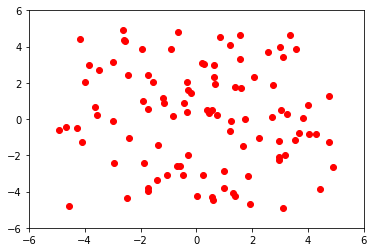

In [25]:
# Plot de datos XS y YS
plt.plot(xs, ys, 'ro')
plt.axis([-6, 6, -6, 6])

In [26]:
# Función de Sklearn para preprocesamiento de datos
X_scaled = preprocessing.scale(xs)
Y_scaled = preprocessing.scale(ys)

[-5, 5, -5, 5]

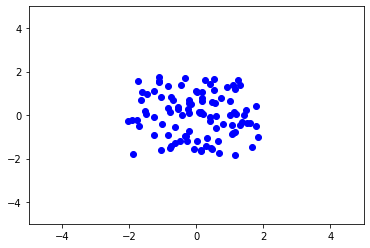

In [27]:
plt.plot(X_scaled, Y_scaled, 'bo')
plt.axis([-5, 5, -5, 5])

In [28]:
# Función de Sklearn para normalización de datos
X_normalized = preprocessing.normalize([X_scaled], norm='l2')
Y_normalized = preprocessing.normalize([Y_scaled], norm='l2')

[-0.5, 0.5, -0.5, 0.5]

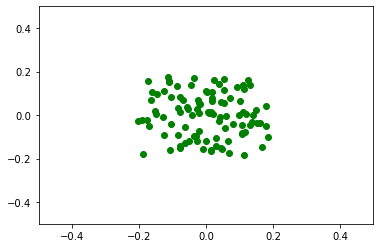

In [30]:
plt.plot(X_normalized, Y_normalized, 'go')
plt.axis([-0.5, 0.5, -0.5, 0.5])

## Datos No Estructurados

Los datos **no** estructurados se procesan diferente a los estructurados. Esto porque estos tipos de datos poseen características diferentes. Por ejemplo, una imagen tiene sus datos distribuidos de manera espacial, por lo que contiene más información que la que a simple vista se puede observar.

In [31]:
images = []
data = []

In [32]:
for i in range(11):
    img = cv2.imread('data/images/img'+str(i)+'.jpg') # Lectura de Imagen
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Transformación de Imagen de BGR a RGB
    images.append(img) # Añadiendo la imagen leida a una lista

In [33]:
index = 0

In [34]:
index += 1

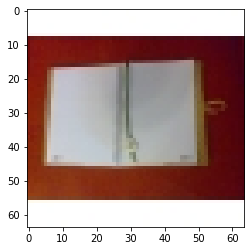

In [35]:
# Función de Matplotlib para ver de una imagen
plt.imshow(images[index])

### Etiquetado

El etiquetado en un sistema de clasificación de patrones es una de las tareas más importantes. Esto porque un computador "aprende" a resolver un problema de una manera distinta a la de un humano. El se basa en los datos o ejemplos que sea posible observar. Por esto, si el etiquetado de un conjunto de datos está mal elaborado, el computador no podrá resolver el problema de manera óptima.

In [37]:
label = ["Mouse", "Agenda", "Agenda", "Marcador", "Tijeras", "Cinta", "Mouse", "Marcador", "Tijeras", "Cinta", "Tijeras"]

In [38]:
for i in range(len(images)):
    data.append([images[i], label[i]])

In [39]:
for i in range(len(data)):
    print(data[i][1])

Mouse
Agenda
Agenda
Marcador
Tijeras
Cinta
Mouse
Marcador
Tijeras
Cinta
Tijeras


### Normalización y Otros

Los datos no estructurados también pueden ser normalizados. Para las imágenes se realizan 3 tipos de procesos importantes: ajustar dimensionalidad (Resize), normalizar valores de intensidad (Normalize) y aumentar el dato (Augmentation Data)

In [41]:
index = 0

In [42]:
index += 1
images[index].shape

(64, 64, 3)

In [43]:
images_resize = []

In [44]:
for i in images:
    aux = cv2.resize(i,(128,128)) # Función para reescalar el tamaño de una imagen
    images_resize.append(aux)

In [45]:
images_normalize = []

In [46]:
for i in images_resize:
    aux = cv2.normalize(i, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) # Función para Normalizar los valores de intensidad de una imagen
    images_normalize.append(aux)

### Images augmentation

In [47]:
images = images_normalize

In [49]:
# dictionary of the transformations functions we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}

# Bloque de código para aplicar augmentation a un conjunto de imagenes
augmentation_images = []
for img in images:
    num_transformations_to_apply = random.randint(1, len(available_transformations))
    num_transformations = 0
    transformed_image = None
    while num_transformations <= num_transformations_to_apply:
        # choose a random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        img = random.choice(list(images))
        transformed_image = available_transformations[key](img)
        num_transformations += 1
        augmentation_images.append(transformed_image)

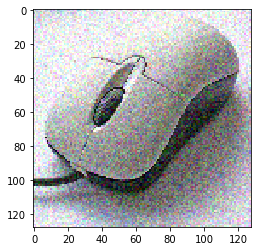

In [53]:
plt.imshow(augmentation_images[4])